In [6]:
from unitaries.single_qubit_exact import *
from evolution_methods.single_qubit_exact import *
from evolution_methods.single_qubit_helpers import *
from state_vectors.helpers import *
from plotting import *
import numpy as np
from functools import partial
%matplotlib nbagg

ImportError: No module named 'helpers'

### Hamiltonians

- h_3 and u_3 are hamiltonian and unitaries for constant Z and X rotation (amp modulates X rotation and detuning modulates Z rotation)
- h_4 and h_5 are hamiltonians for constant Z rotation and time dependent X rotation modulated by a cosine and sine respectively (amp and detuning as above)

### Exact unitary evolution

In [2]:
x0 = [normalise_state_vector([1, 1])]
x1 = [normalise_state_vector([1, 0])]

<IPython.core.display.Javascript object>


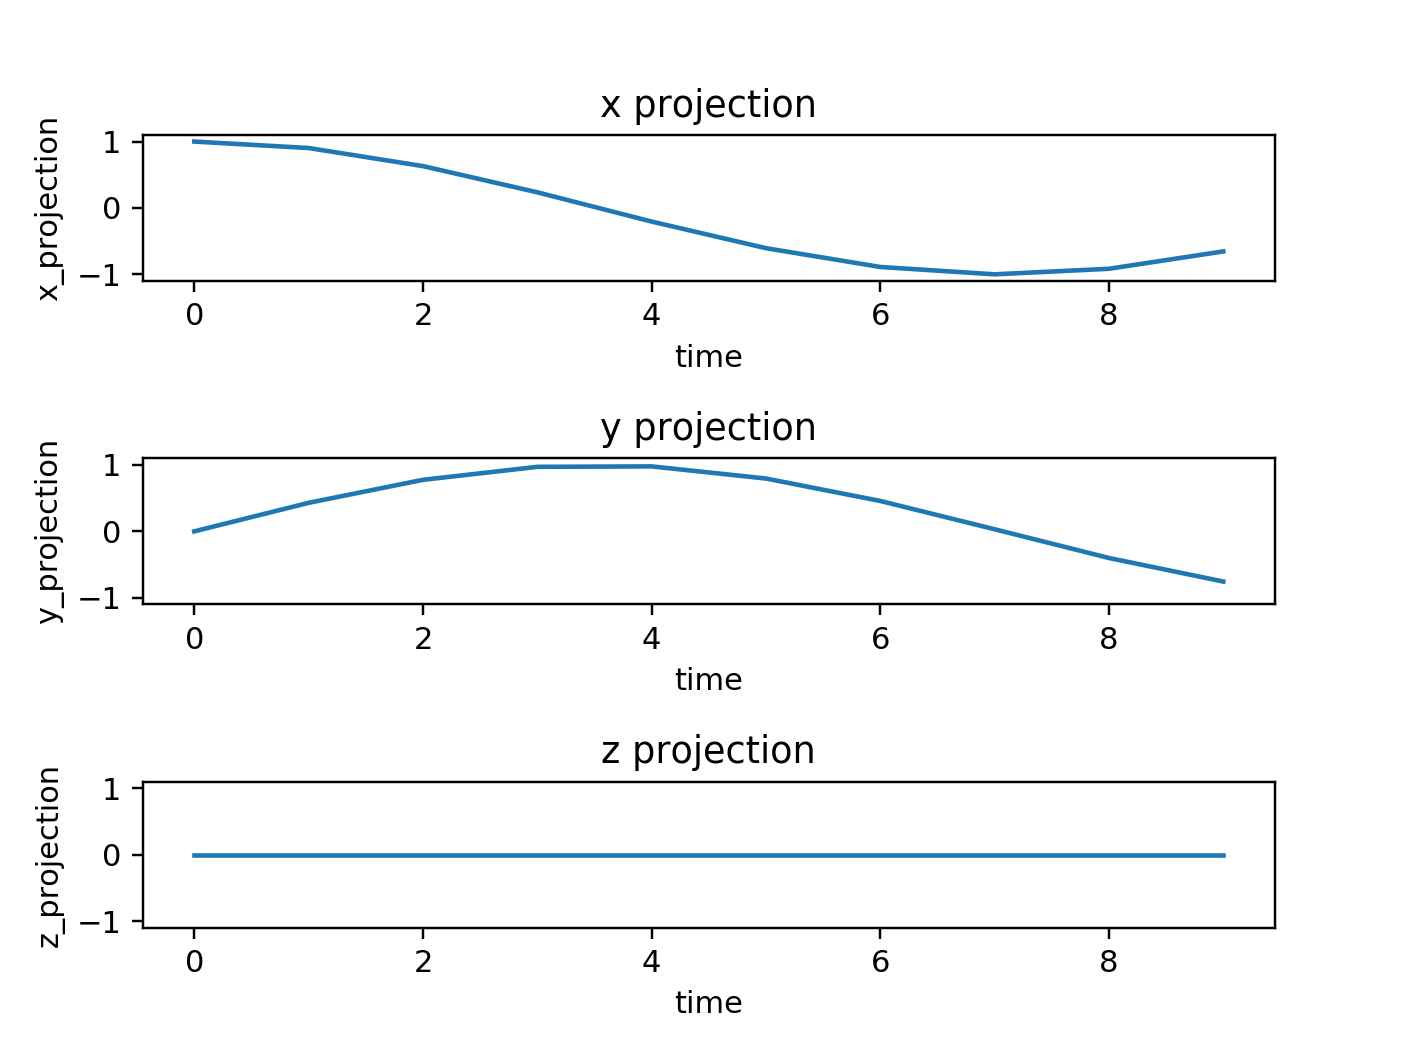

/Users/natalie/Documents/PhD/Qsim/state_vectors/helpers.py:149: ComplexWarning: Casting complex values to real discards the imaginary part
  projections[i][j] = np.dot(state_dagger, np.dot(projection_matrices[j], state))


In [3]:
x = u_1(np.arange(10)/10, x0, detuning=1/np.sqrt(2))
pl = plot_projections(x)

<IPython.core.display.Javascript object>


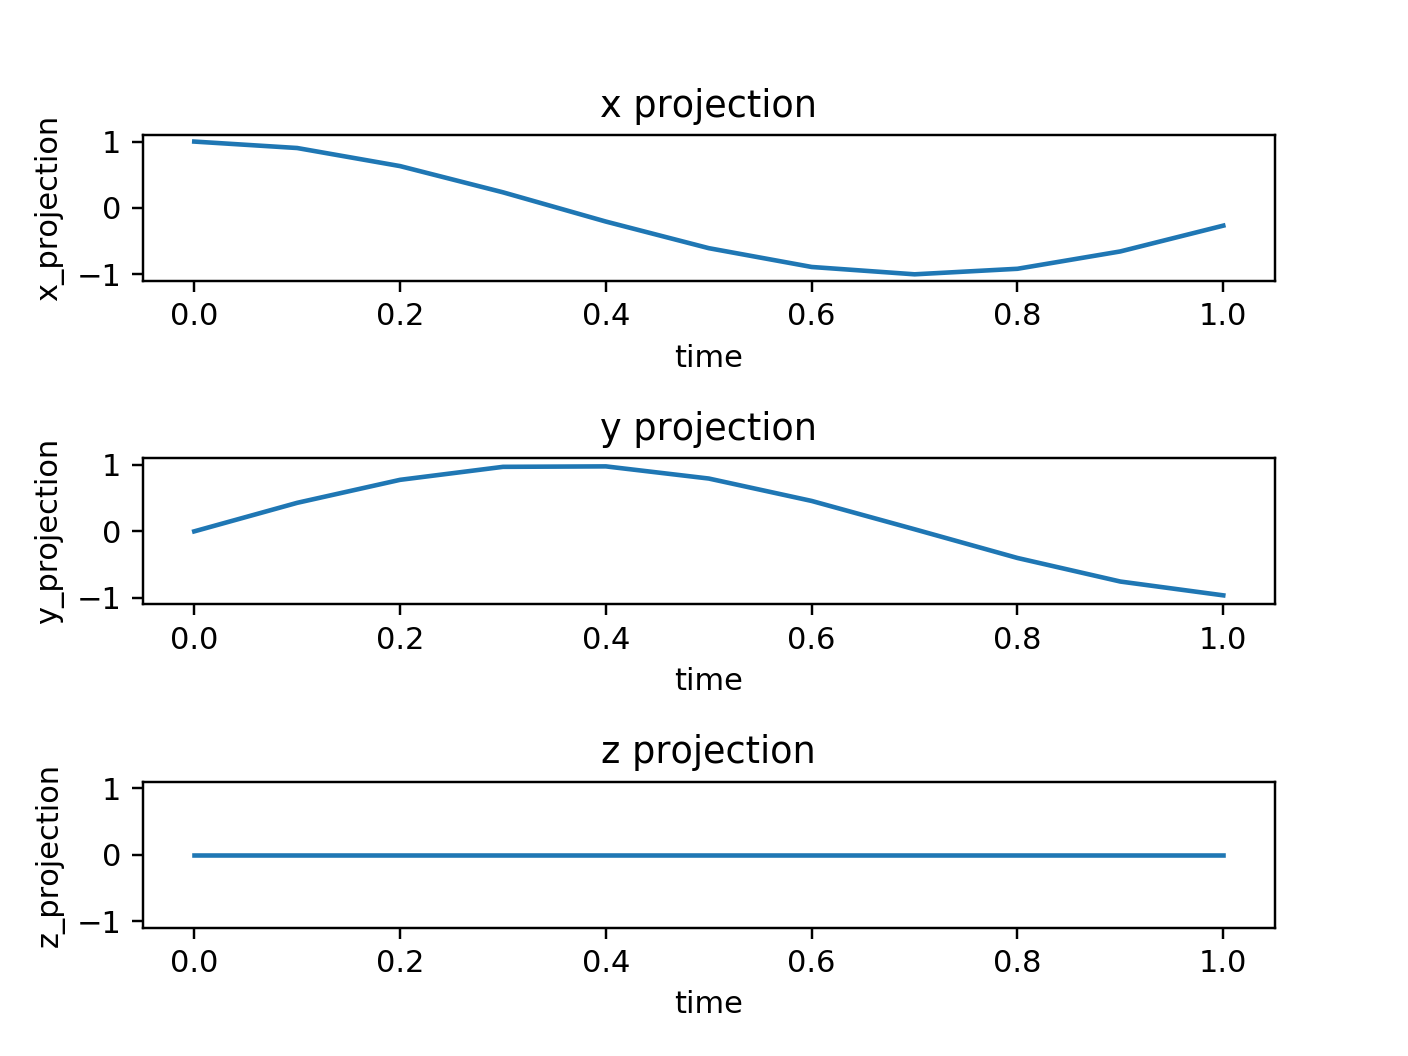

/Users/natalie/Documents/PhD/Qsim/state_vectors/helpers.py:149: ComplexWarning: Casting complex values to real discards the imaginary part
  projections[i][j] = np.dot(state_dagger, np.dot(projection_matrices[j], state))


In [4]:
t, x = unitary_evolution(x0, u_1, 0.1, 1, detuning=1/np.sqrt(2))
pl = plot_projections(x, t)

<IPython.core.display.Javascript object>


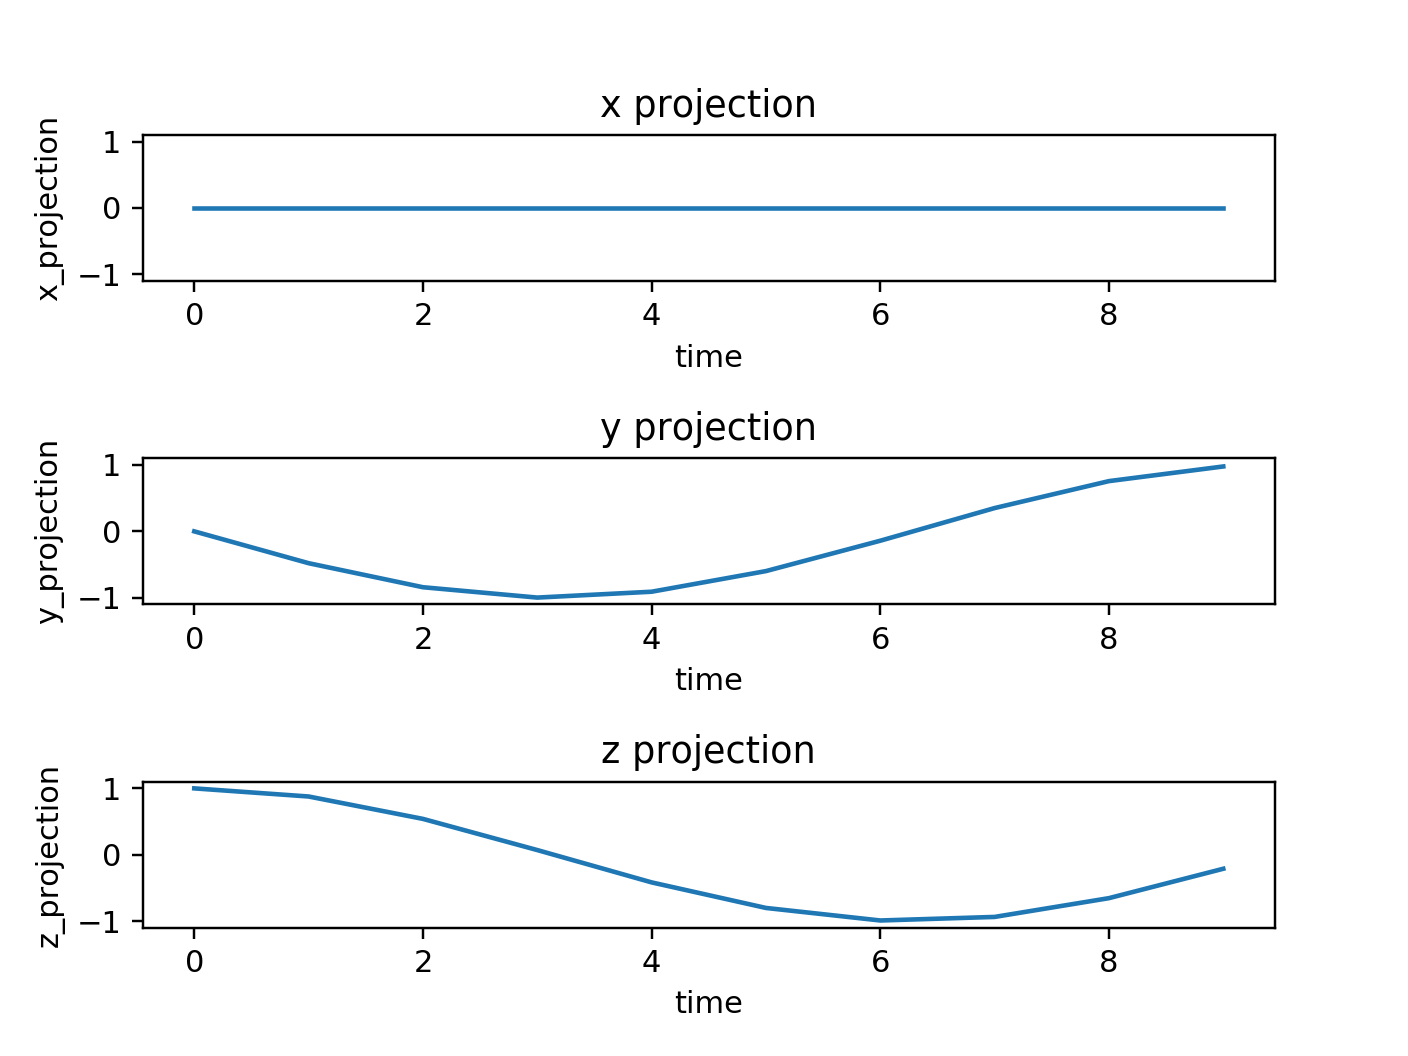

/Users/natalie/Documents/PhD/Qsim/state_vectors/helpers.py:149: ComplexWarning: Casting complex values to real discards the imaginary part
  projections[i][j] = np.dot(state_dagger, np.dot(projection_matrices[j], state))


In [5]:
x = u_3(np.arange(10)/10, x1, detuning=0, amp=5)
pl = plot_projections(x)

<IPython.core.display.Javascript object>


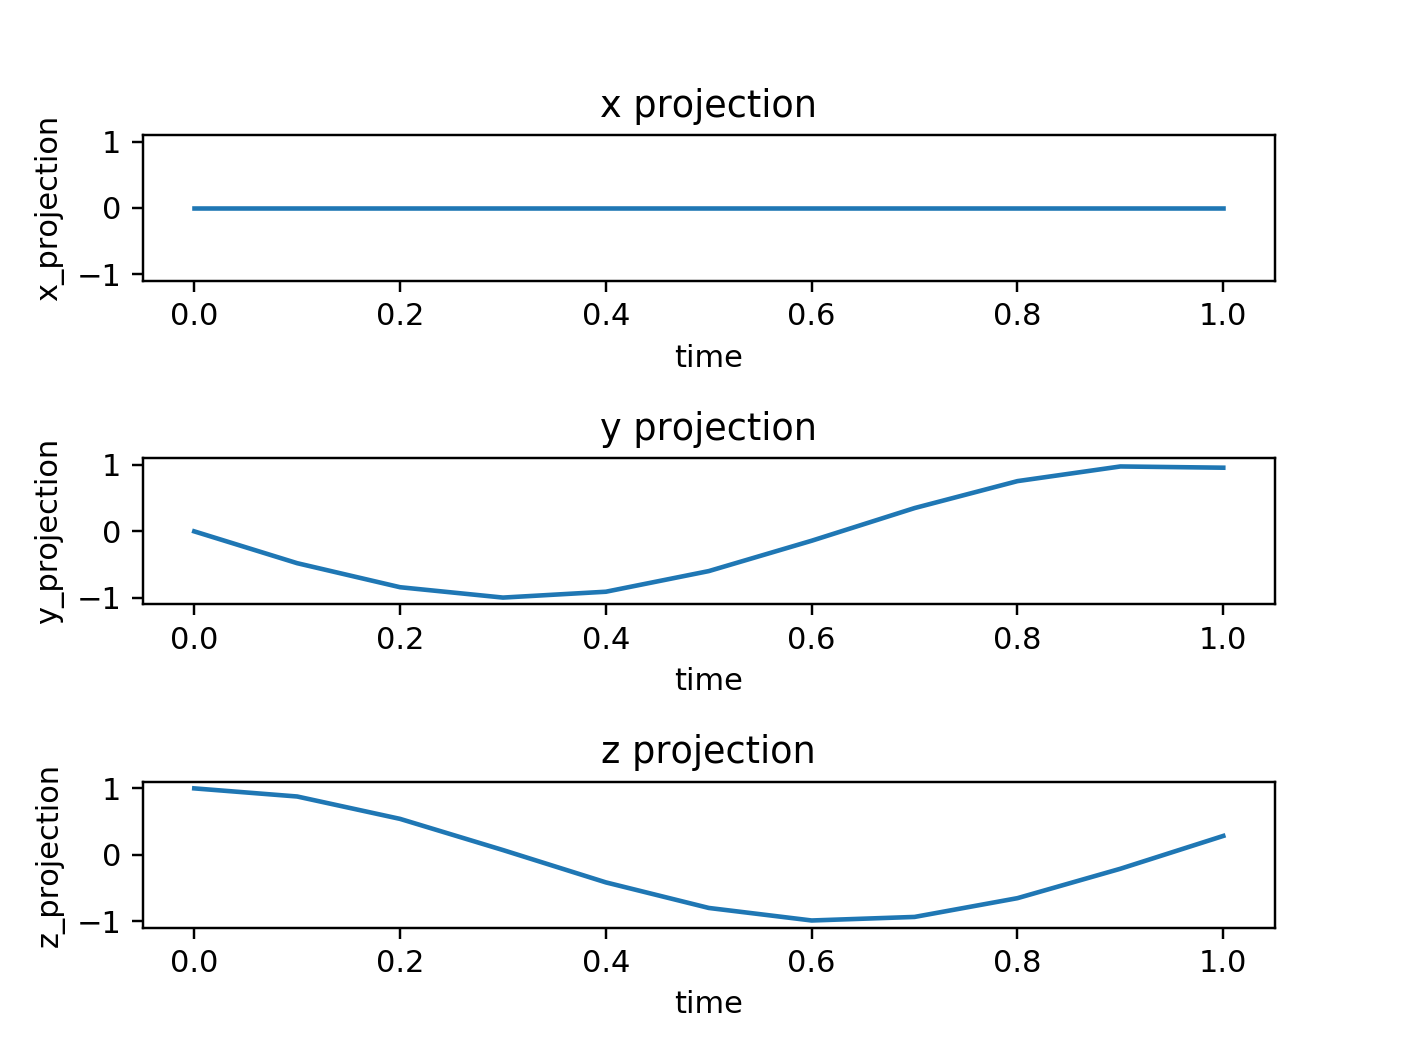

/Users/natalie/Documents/PhD/Qsim/state_vectors/helpers.py:149: ComplexWarning: Casting complex values to real discards the imaginary part
  projections[i][j] = np.dot(state_dagger, np.dot(projection_matrices[j], state))


In [6]:
t, x = unitary_evolution(x1, u_3, 0.1, 1, detuning=0, amp=5)
pl = plot_projections(x, t)

(3, 101, 2)


<IPython.core.display.Javascript object>


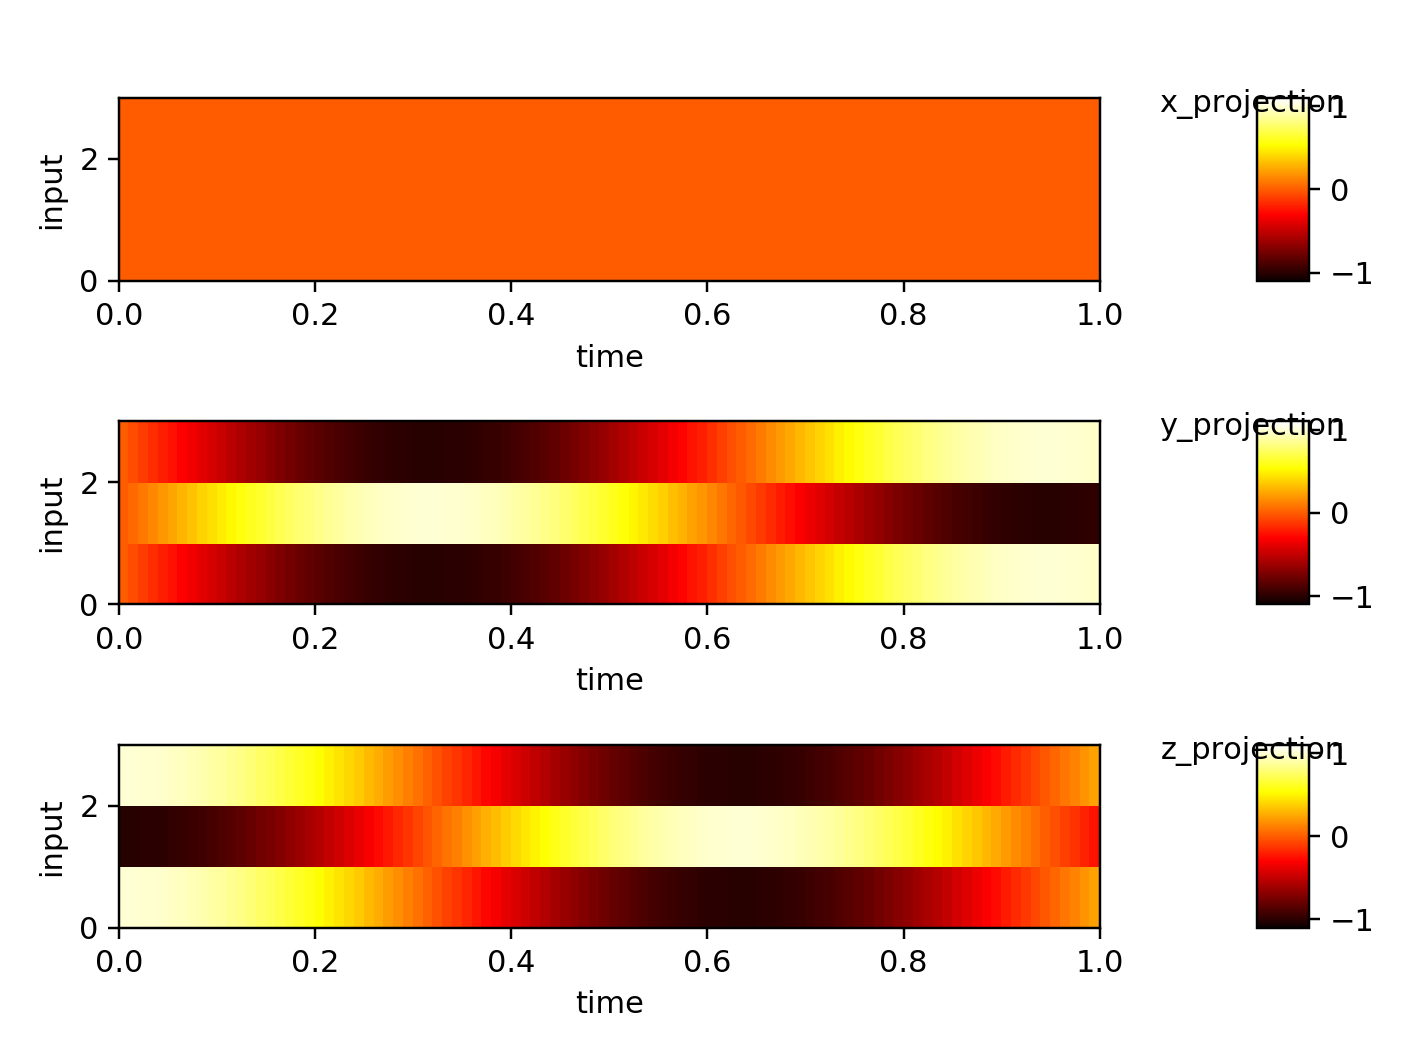

/Users/natalie/Documents/PhD/Qsim/state_vectors/helpers.py:149: ComplexWarning: Casting complex values to real discards the imaginary part
  projections[i][j] = np.dot(state_dagger, np.dot(projection_matrices[j], state))


In [3]:
t, x = unitary_evolution([[1, 0], [0, 1], [1, 0]], u_3, 0.01, 1, detuning=0, amp=5)
pl = plot_projections(x, x_axis=t)

In [7]:
pi_duration = 4e-8
pi_amp = 80e6
pi = partial(action, unitary_evolution, u_3, pi_duration,
                  pi_duration, amp=pi_amp)

NameError: name 'action' is not defined

#### detuning sweep

In [3]:
from scipy.special import jv as bessel

In [5]:

bessel(0, 80e6/ 20e6)

-0.39714980986384746

In [4]:
pi_half_duration = 15.7e-9
pi_half_amp = 80e6
pi_half = partial(action, unitary_evolution, u_3, pi_half_duration,
                  pi_half_duration, amp=pi_half_amp)
pi_half_neg = partial(action, unitary_evolution, u_3, pi_half_duration,
                  pi_half_duration, amp=-1 * pi_half_amp)

<IPython.core.display.Javascript object>


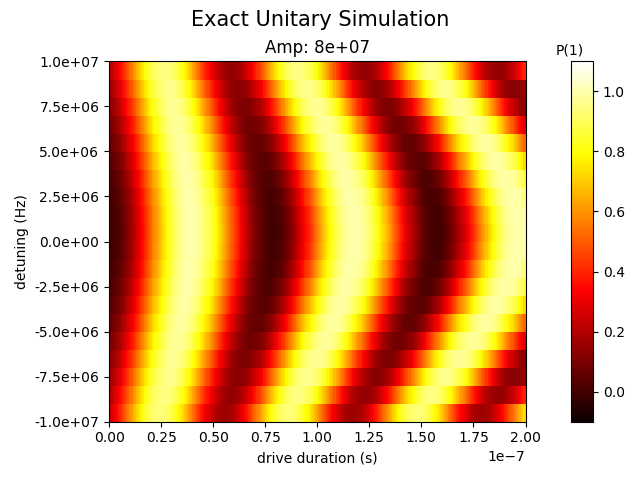

In [9]:
amp = 80e6
x, y, z = detuning_sweep(-10e6, 10e6, 1e6, [1, 0], unitary_evolution, u_3, 1e-9, 2e-7
                                 ,action_before=pi_half
                                 ,action_after=pi_half_neg
                                ,amp=amp)
f = plot_sim(x, y, z, amp=amp, title="Exact Unitary Simulation")

### Runge Kutta evolution

In [1]:
t, x = RK4([1/np.sqrt(2), 1/np.sqrt(2)] , h_6, 1e-9, 500e-9, detuning=1 ,amp=1, mod_freq=10e6)
pl = plot_projections(t, x)

NameError: name 'RK4' is not defined

#### detuning sweep

<IPython.core.display.Javascript object>


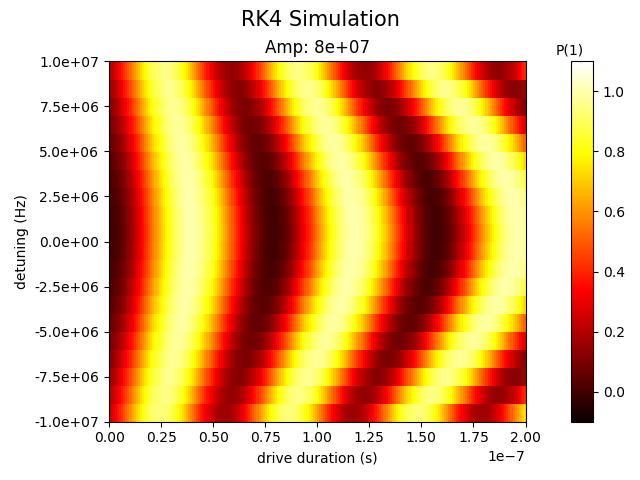

In [9]:
amp = 80e6
x, y, z = detuning_sweep(-10e6, 10e6, 1e6, [1, 0], RK4, h_3, 1e-9, 2e-7
                              ,amp=amp
                             ,action_before=pi_half
                            ,action_after=pi_half_neg)
f = plot_sim(x, y, z, amp=amp, title='RK4 Simulation')
# f.savefig(location+'exact_unitary_rabis.png')

<IPython.core.display.Javascript object>


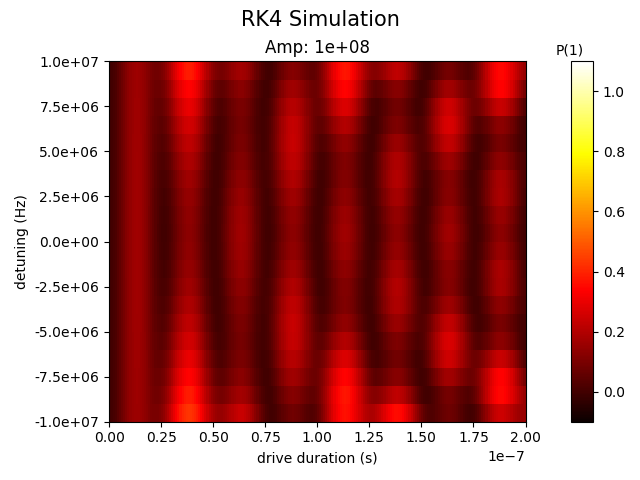

In [10]:
amp = 100e6
mod_freq = 20e6
x, y, z = detuning_sweep(-10e6, 10e6, 1e6, [1, 0], RK4, h_4, 1e-9, 2e-7,
                            amp=amp, mod_freq=mod_freq)
f = plot_sim(x, y, z, amp=amp, title='RK4 Simulation')

<IPython.core.display.Javascript object>


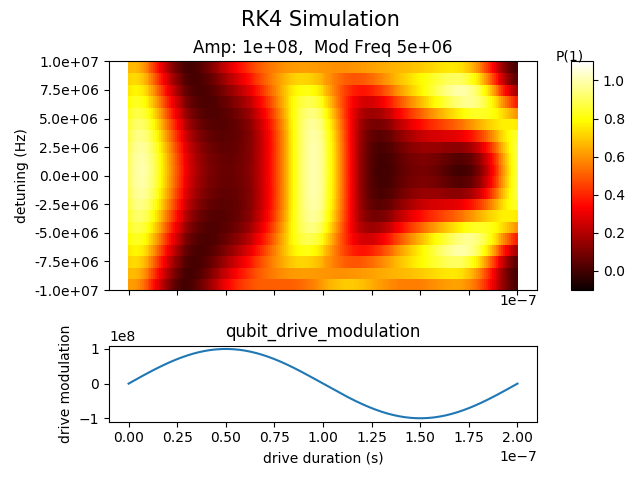

In [12]:
amp = 100e6
mod_freq = 5e6
x, y, z = detuning_sweep(-10e6, 10e6, 1e6, [1, 0], RK4, h_4, 1e-9, 2e-7,
                            amp=amp, mod_freq=mod_freq,
                             action_before=pi_half,
                            action_after=pi_half)
mod_array = amp * np.sin(2 * np.pi * mod_freq * x)
f = plot_sim_mod(x, y, z, mod_array, amp=amp, mod_freq=mod_freq,
                 title='RK4 Simulation')

/Users/natalie/Documents/PhD/Qdev/Floquet/Floquet_code/simulation_fns/execution_methods.py:57: RuntimeWarning: invalid value encountered in multiply
  k1 = -1j * hamiltonian(t[i - 1], x[i - 1], **kwargs)
/Users/natalie/Documents/PhD/Qdev/Floquet/Floquet_code/simulation_fns/projections.py:19: RuntimeWarning: overflow encountered in cdouble_scalars
  for m in x]).real
/Users/natalie/Documents/PhD/Qdev/Floquet/Floquet_code/simulation_fns/projections.py:19: RuntimeWarning: invalid value encountered in cdouble_scalars
  for m in x]).real
/Users/natalie/Documents/PhD/Qdev/Floquet/Floquet_code/simulation_fns/execution_methods.py:58: RuntimeWarning: invalid value encountered in multiply
  k2 = -1j * hamiltonian(t[i - 1], x[i - 1] + (step / 2) * k1, **kwargs)
/Users/natalie/Documents/PhD/Qdev/Floquet/Floquet_code/simulation_fns/execution_methods.py:59: RuntimeWarning: invalid value encountered in multiply
  k3 = -1j * hamiltonian(t[i - 1], x[i - 1] + (step / 2) * k2, **kwargs)
/Users/natalie/Do

<IPython.core.display.Javascript object>


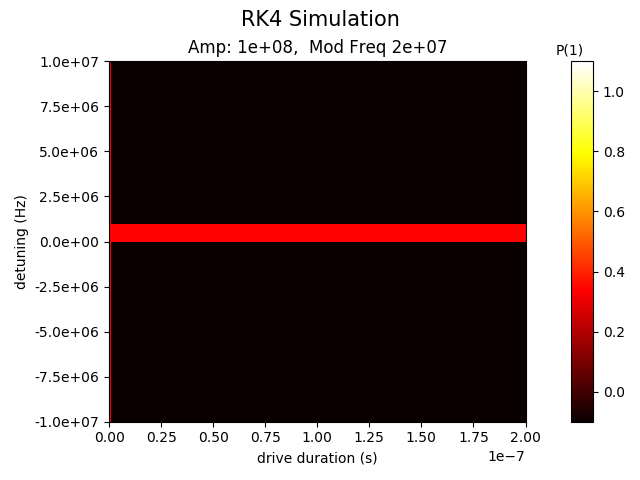

<IPython.core.display.Javascript object>


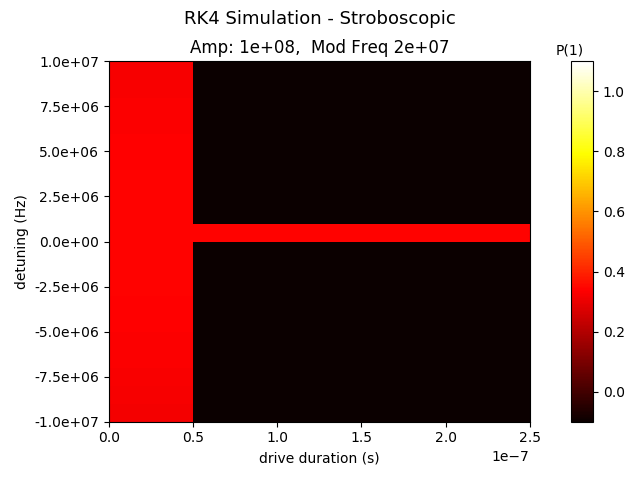

In [15]:
amp = 100e6
mod_freq = 20e6
sr = 1e9

x, y, z = detuning_sweep(-10e6, 10e6, 1e6, [1, 0], RK4, h_6, 1/sr, 2e-7,
                          action_before=pi_half,
                            amp=amp, mod_freq=mod_freq)
f = plot_sim(x, y, z, amp=amp, mod_freq=mod_freq, title='RK4 Simulation')
f2 = plot_sim_stroboscopic(x, y, z, sr, amp=amp, mod_freq=mod_freq,
                            title='RK4 Simulation - Stroboscopic')